In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

In [5]:
module_path = os.path.abspath(os.path.join('..', 'utils'))

if module_path not in sys.path:
    sys.path.append(module_path)

from utils import DataAnalysis, DataQualityReport

In [3]:
df = pd.read_csv('osm_places_leisure.csv')

threshold = int(0.03* df.shape[0])
df = df.dropna(axis=1, thresh=threshold)

In [4]:
da = DataAnalysis("osm_places_leisure", df)

Number of rows: 418
Number of cols: 27



Column types:
id: int64
lat: float64
lon: float64
ele: float64
gnis:feature_id: float64
leisure: object
name: object
wikidata: object
addr:city: object
addr:postcode: float64
addr:state: object
operator: object
opening_hours: object
website: object
addr:street: object
addr:housenumber: object
dance:teaching: object
amenity: object
drink:beer: object
phone: object
toilets: object
wheelchair: object
tourism: object
cuisine: object
email: object
access: object
garden:type: object


 Convert column types to desired ones before continuing


In [5]:
df.columns

Index(['id', 'lat', 'lon', 'ele', 'gnis:feature_id', 'leisure', 'name',
       'wikidata', 'addr:city', 'addr:postcode', 'addr:state', 'operator',
       'opening_hours', 'website', 'addr:street', 'addr:housenumber',
       'dance:teaching', 'amenity', 'drink:beer', 'phone', 'toilets',
       'wheelchair', 'tourism', 'cuisine', 'email', 'access', 'garden:type'],
      dtype='object')

In [6]:
df.drop(['ele', 'gnis:feature_id', 'leisure', 
       'wikidata', 'operator',
       'dance:teaching', 'amenity', 'drink:beer', 'toilets',
       'tourism', 'cuisine', 'garden:type'], axis=1, inplace=True)
df['id'] = df['id'].astype('category')

In [7]:
df['id'] = df['id'].astype('category')


In [8]:
da.df.dtypes

id                  category
lat                  float64
lon                  float64
name                  object
addr:city             object
addr:postcode        float64
addr:state            object
opening_hours         object
website               object
addr:street           object
addr:housenumber      object
phone                 object
wheelchair            object
email                 object
access                object
dtype: object

Number of duplicate rows: 0
id 0
lat 0
lon 0
name 40
addr:city 382
addr:postcode 372
addr:state 382
opening_hours 384
website 348
addr:street 345
addr:housenumber 349
phone 365
wheelchair 406
email 405
access 397


Value proportions:
id
357545993      0.002392
7788619719     0.002392
7194158062     0.002392
7177579526     0.002392
7091082299     0.002392
                 ...   
357639878      0.002392
357639870      0.002392
357639852      0.002392
357639844      0.002392
11906951073    0.002392
Name: proportion, Length: 418, dtype: float64
name
NaN                             0.095694
Chuck E. Cheese                 0.011962
Rose Garden                     0.007177
Perennial Garden                0.004785
Barcade                         0.004785
                                  ...   
Garden Playground               0.002392
Fred Astair Dance Studios       0.002392
Fragrance Garden                0.002392
Fountain of Youth Playground    0.002392
Little Flower Playground        0.0023

<Figure size 640x480 with 0 Axes>

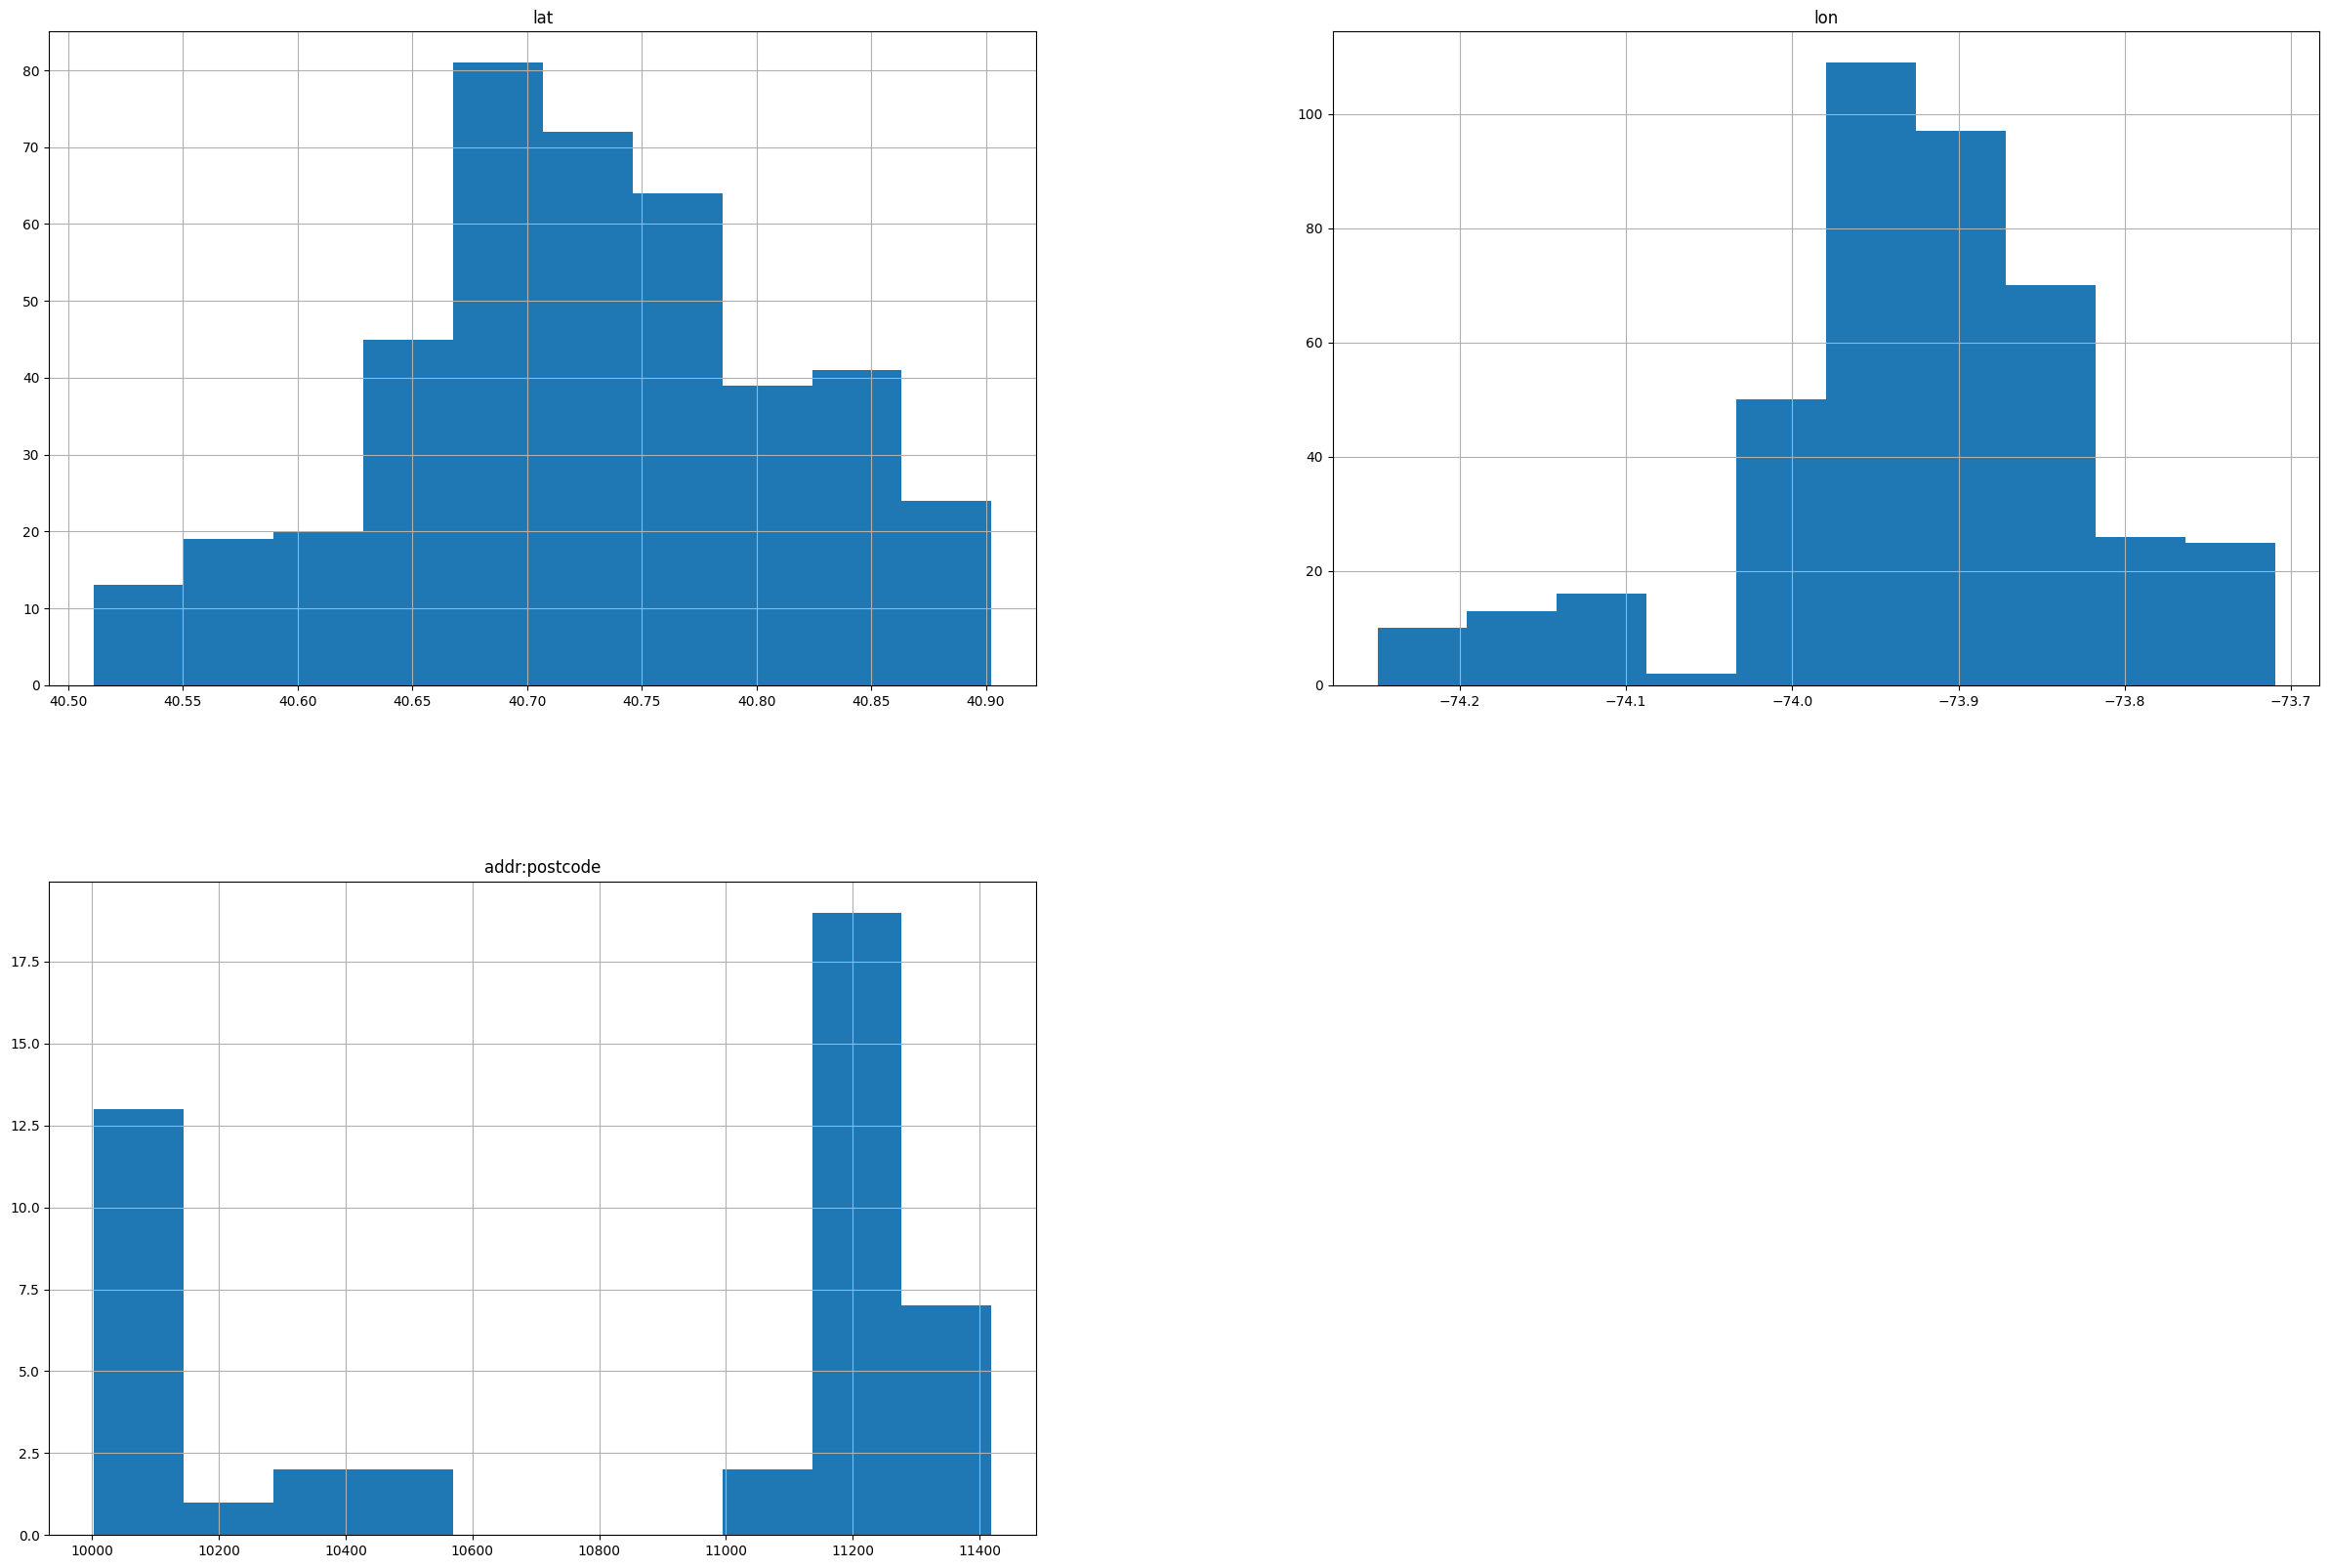

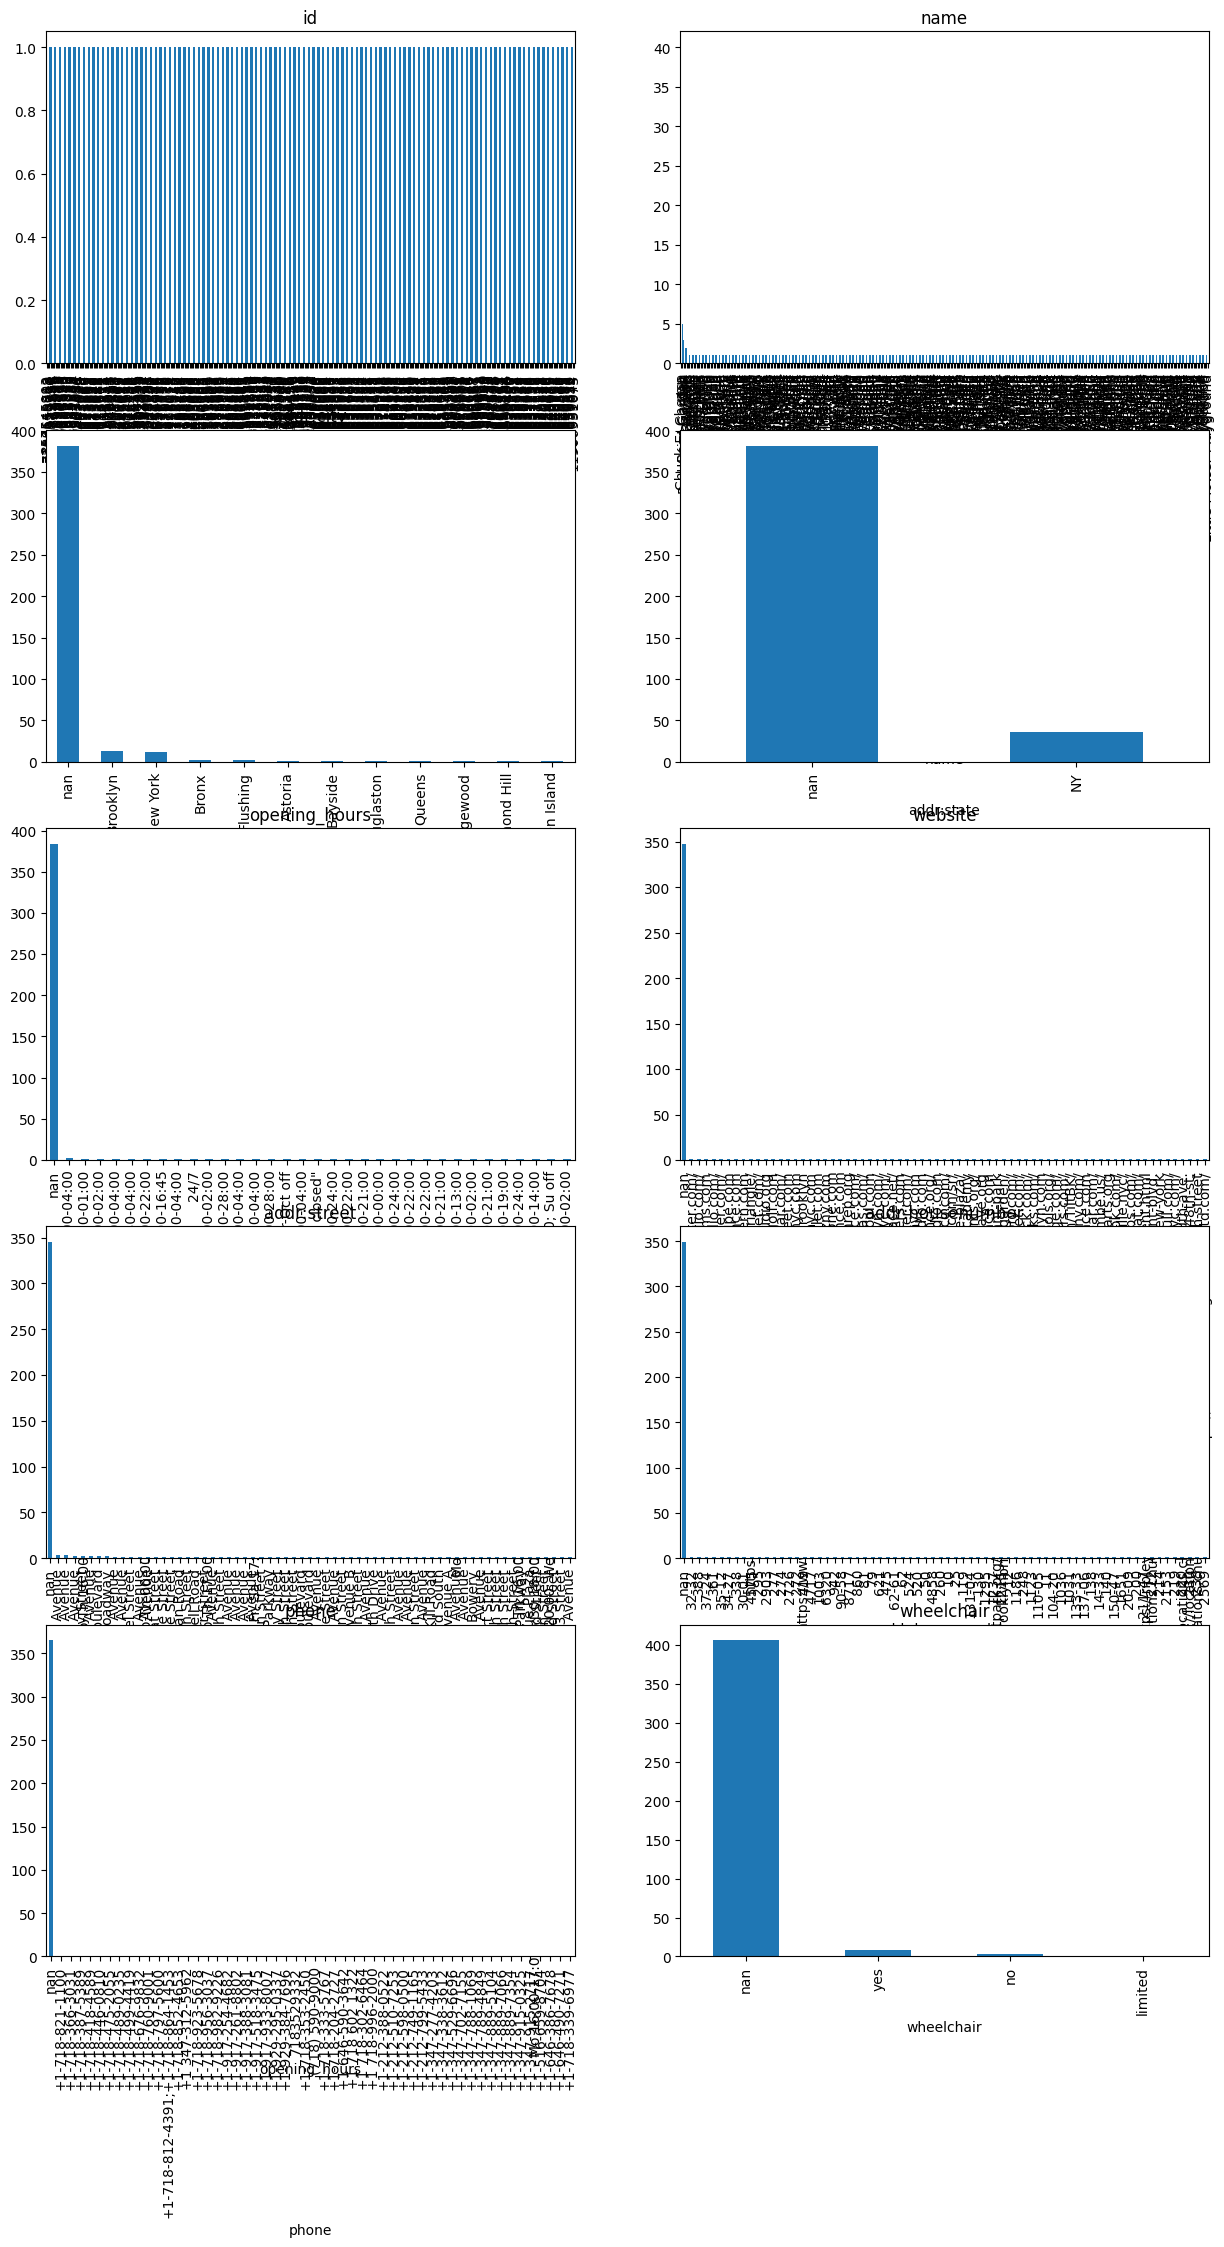

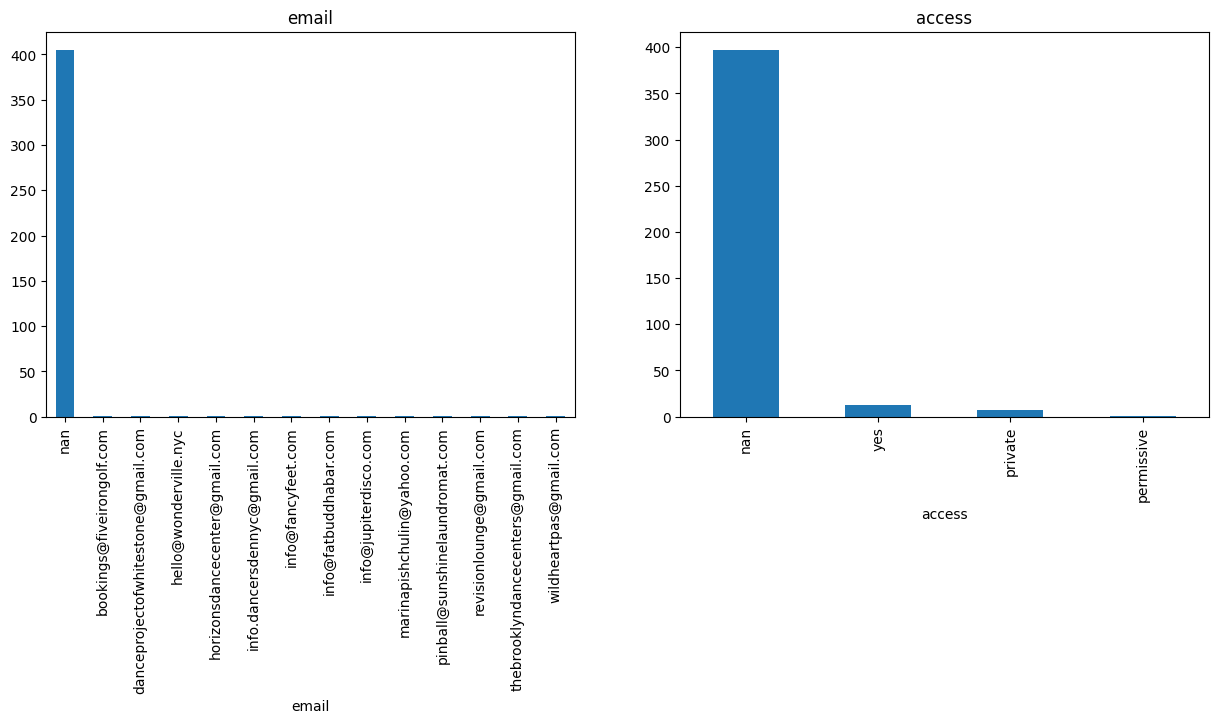

In [9]:
da.analyse()

In [10]:
from docx import Document
from docx.shared import Inches
import humanize

In [11]:
params = {
    "title": "OSM Leisure",
    "description": "leisure",
    "source": "Overpass Turbo API",
    "detailed_desc": "information on different leisure places in New York City, including arcades, beach resorts, parks and stadiums",
    "source_link": "https://overpass-turbo.eu/"
}

dqr = DataQualityReport(da, params)
dqr.write_document()

### Logical Integrity Tests 
1. Address State not NY.
2. Website doesn't start with https://
3. Zip codes not in list of known NYC zip codes
4. 


In [12]:
# Test 1:
df[(df['addr:state'] != 'NY') & ~( df['addr:state'].isna())]

,id,lat,lon,name,addr:city,addr:postcode,addr:state,opening_hours,website,addr:street,addr:housenumber,phone,wheelchair,email,access


In [13]:
# Test 2:
df['website'] = df['website'].astype(str)
df['website'] = df['website'].fillna('')
df[~(df['website'].str.startswith('https://') | df['website'].str.startswith('http://')) & ~(df['website'] == 'nan')]

,id,lat,lon,name,addr:city,addr:postcode,addr:state,opening_hours,website,addr:street,addr:housenumber,phone,wheelchair,email,access
224,5342819711,40.777178,-73.812904,The Dance Project,NaN,NaN,NaN,NaN,www.danceprojectofwhitestone.com,Willets Point Boulevard,150-47,+1-718-353-2450,NaN,danceprojectofwhitestone@gmail.com,NaN
226,5405349612,40.769286,-73.914457,Callina's School of Dance,NaN,NaN,NaN,NaN,www.callinadance.com,Astoria Boulevard South,35-12,+1-718-204-2727,NaN,NaN,NaN


In [34]:
# Test 3:
# Zip coes obtained from nyc_zip_codes_scrape.ipynb
zip = pd.read_csv("zipcodes.csv")
zip['zip'] = zip['zip'].astype('Int64')
zip['zip'] = zip['zip'].astype(str)


In [22]:
zip['zip']

0      10001
1      10002
2      10003
3      10004
4      10005
       ...  
475    10309
476    10310
477    10311
478    10312
479    10314
Name: zip, Length: 480, dtype: Int64

In [29]:
df['addr:postcode']

0       <NA>
1       <NA>
2       <NA>
3       <NA>
4       <NA>
       ...  
413     <NA>
414     <NA>
415    11354
416     <NA>
417     <NA>
Name: addr:postcode, Length: 418, dtype: object

In [15]:
df['addr:postcode'] = df['addr:postcode'].astype('Int64')

In [18]:
df['addr:postcode'] = df['addr:postcode'].astype(str)

In [32]:
df[df['addr:postcode'].isin([11354])]

,id,lat,lon,name,addr:city,addr:postcode,addr:state,opening_hours,website,addr:street,addr:housenumber,phone,wheelchair,email,access


In [36]:
df[~df['addr:postcode'].isin(zip['zip']) & (df['addr:postcode'] != "<NA>")]

,id,lat,lon,name,addr:city,addr:postcode,addr:state,opening_hours,website,addr:street,addr:housenumber,phone,wheelchair,email,access
